Mean Squared Error: 0.000670688327467047
Predicted stock returns: [-0.00127544 -0.00483666]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


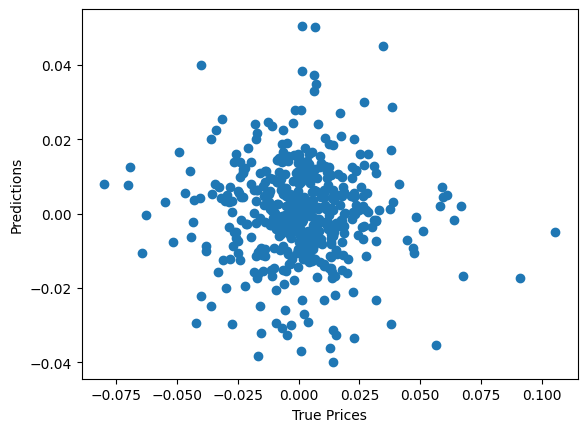

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


df = pd.read_csv('AppleNewsStock.csv')


df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


df['Returns'] = df['Adj Close'].pct_change()
df.dropna(inplace=True)


def analyze_sentiment(news_column):
    sentiments = []
    for article in news_column:
        if isinstance(article, str):
            blob = TextBlob(article)
            sentiments.append(blob.sentiment.polarity)
        else:
            sentiments.append(0)
    return sentiments

df['Sentiment'] = analyze_sentiment(df['News'])


X = df[['Sentiment']]
y = df['Returns']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:",mse)

future_sentiment = np.array([[0.8], [-0.2]])
predicted_returns = model.predict(future_sentiment)
print("Predicted stock returns:", predicted_returns)

plt.scatter(y_test,predictions)
plt.xlabel("True Prices")
plt.ylabel("Predictions")
plt.show()